In [78]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
#loading data file
data=pd.read_csv('/content/Obesity.csv')

###Understanding the data file

In [80]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [81]:
data.shape

(2111, 17)

In [82]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [83]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.488346,7.365358,2.00,19.947192,22.804818,26.000000,99.00
Height,2101.0,1.701995,0.093288,1.45,1.630000,1.701284,1.768834,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [84]:
# understanding datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [85]:
#displaying the null values
data.isnull().sum()

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64

In [86]:
#Data copied to a new file for EDA
data_ob = data

In [87]:
data_ob.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [88]:
#filling missing object data

data_ob['Gender'].fillna(data_ob['Gender'].mode()[0], inplace=True)
data_ob['family_history_with_overweight'].fillna(data_ob['family_history_with_overweight'].mode()[0], inplace=True)
data_ob['CAEC'].fillna(data_ob['CAEC'].mode()[0], inplace=True)
data_ob['SCC'].fillna(data_ob['SCC'].mode()[0], inplace=True)
data_ob['MTRANS'].fillna(data_ob['MTRANS'].mode()[0], inplace=True)


In [89]:
#filling missing numerical data
data_ob['Height'].fillna(data_ob['Height'].mode()[0], inplace=True)

In [90]:
# verifiying data for null values
data_ob.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

### Understanding the relationship between various variables

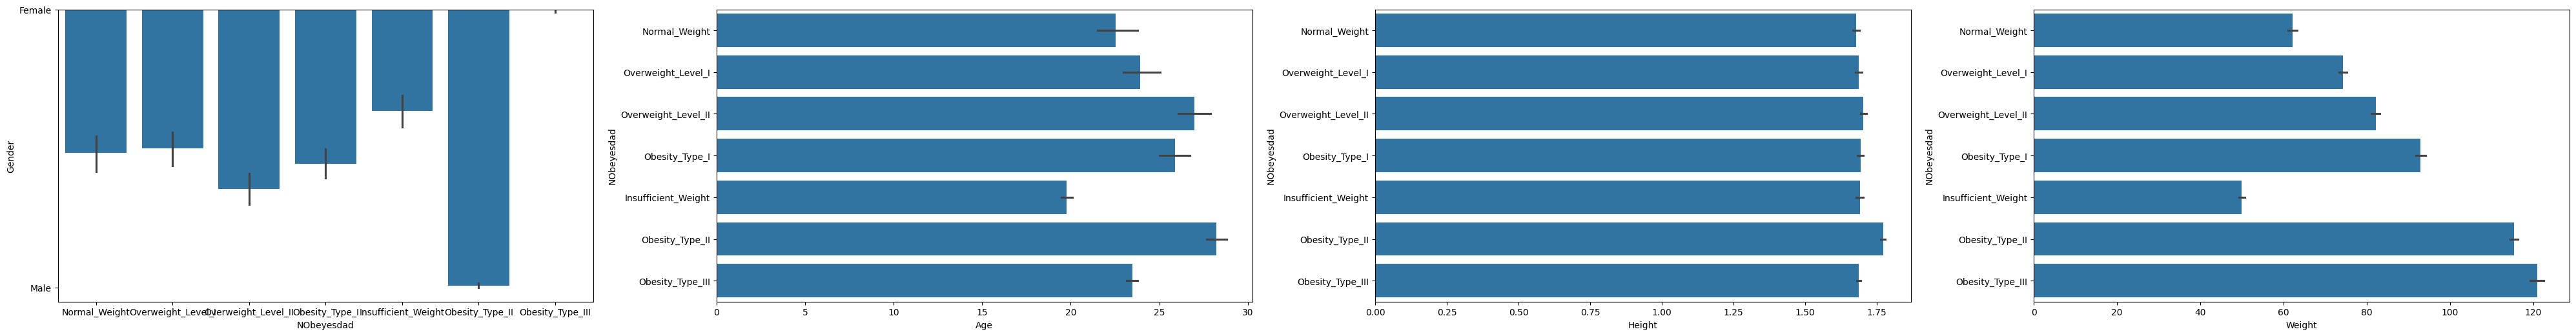

In [91]:
# Plotting the relationship between demographics and obesity

plt.figure(figsize=(40,10))

plt.subplot(2,4,1)
sns.barplot(x='NObeyesdad', y='Gender', data=data_ob)

plt.subplot(2,4,2)
sns.barplot(x='Age', y='NObeyesdad', data=data_ob)

plt.subplot(2,4,3)
sns.barplot(x='Height', y='NObeyesdad', data=data_ob)

plt.subplot(2,4,4)
sns.barplot(x='Weight', y='NObeyesdad', data=data_ob)

plt.tight_layout()
plt.show()

Inferences:
1. Males are found to be more obese than females
2. As the Age increases chances for being obese and diabetic increases
3. Height does not influence obesity or diabetics
4. Increase in weight has a direct effect on being obese and getting diabetics


In [92]:
# Encoding obesity classes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_ob["NObeyesdad"] = le.fit_transform(data_ob["NObeyesdad"])
le.classes_ = pd.Series(['Normal_Weight', 'Overweight_Level_I','Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', "Obesity_Type_III", 'Insufficient_Weight '])
data_ob["NObeyesdad"] = le.fit_transform(data_ob["NObeyesdad"])
data_ob.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,5
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,6


In [93]:
#encoding other categorical values

le = LabelEncoder()
data_ob['Gender'] = le.fit_transform(data_ob['Gender'])
data_ob['family_history_with_overweight'] = le.fit_transform(data_ob['family_history_with_overweight'])
data_ob['FAVC'] = le.fit_transform(data_ob ['FAVC'])
data_ob['CAEC'] = le.fit_transform(data_ob['CAEC'])
data_ob['SMOKE'] = le.fit_transform(data_ob['SMOKE'])
data_ob['SCC'] = le.fit_transform(data_ob['SCC'])
data_ob['CALC'] = le.fit_transform(data_ob['CALC'])
data_ob['MTRANS'] = le.fit_transform(data_ob['MTRANS'])

In [94]:
data_ob.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [117]:
# Copying Endoced file to a new file
data_obf= data_ob

In [118]:
# Scaling Encoded file
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [119]:
scaler.fit(data_obf)
data_obf

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


### Modeling the data

In [120]:
X = data_obf.drop('NObeyesdad',axis=1)
y = data_obf["NObeyesdad"]

In [121]:
## Splitting into test and train data

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [122]:
# printing the shapes test and train files
print(f'X_Train = {X_train.shape}')
print(f'X_test = {X_test.shape}')
print(f'y_train = {y_train.shape}')
print(f'y_test = {y_test.shape}')

X_Train = (1688, 16)
X_test = (423, 16)
y_train = (1688,)
y_test = (423,)


In [123]:
# Understanding Data types of test and train file
X_train.dtypes
X_test.dtypes
y_train.dtypes
y_test.dtypes

dtype('int64')

### KNN

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets, preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [125]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [126]:
print(accuracy_score(y_test, y_pred))

0.8865248226950354


### Linear Regression

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [131]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the model's performance
print("\nModel Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Model Evaluation:
Mean Squared Error: 2.71760695437195
R-squared: 0.26415417493096616


###Decision Tree Regression

In [132]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Decision Tree Regression model
tree_model = DecisionTreeRegressor()

# Fit the model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Display the model's performance
print("\nDecision Tree Regression Model Evaluation:")
print("Mean Squared Error:", mse_tree)
print("R-squared:", r2_tree)


Decision Tree Regression Model Evaluation:
Mean Squared Error: 0.8226950354609929
R-squared: 0.7772390499019395


### Random Forest regression

In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regression model
forest_model = RandomForestRegressor(n_estimators=100)  # You can adjust the number of trees (n_estimators)

# Fit the model on the training data
forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_forest = forest_model.predict(X_test)

# Evaluate the model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

# Display the model's performance
print("\nRandom Forest Regression Model Evaluation:")
print("Mean Squared Error:", mse_forest)
print("R-squared:", r2_forest)


Random Forest Regression Model Evaluation:
Mean Squared Error: 0.40028841607565013
R-squared: 0.8916139954238396


###Lasso Regression Model

In [134]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the regularization strength (alpha)

# Fit the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Display the model's performance
print("\nLasso Regression Model Evaluation:")
print("Mean Squared Error:", mse_lasso)
print("R-squared:", r2_lasso)


Lasso Regression Model Evaluation:
Mean Squared Error: 3.0808028874615414
R-squared: 0.16581169364754167


### Ridge Regression Model

In [135]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you already have X_train, X_test, y_train, y_test

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha)

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display the model's performance
print("\nRidge Regression Model Evaluation:")
print("Mean Squared Error:", mse_ridge)
print("R-squared:", r2_ridge)


Ridge Regression Model Evaluation:
Mean Squared Error: 2.722909368608095
R-squared: 0.26271844141837086


### Accuracy Scores, Mean Squared error and R^2 of All models

**KNN**

Accuracy Score: 0.8865248226950354



**Linear Regression**

Mean Squared Error: 2.71760695437195

R-squared: 0.26415417493096616

**Decision Tree Regression Model Evaluation**

Mean Squared Error: 0.8226950354609929

R-squared: 0.7772390499019395

**Random Forest Regression Model Evaluation**

Mean Squared Error: 0.40028841607565013

R-squared: 0.8916139954238396

**Lasso Regression Model Evaluation**

Mean Squared Error: 3.0808028874615414

R-squared: 0.16581169364754167

**Ridge Regression Model Evaluation**

Mean Squared Error: 2.722909368608095

R-squared: 0.26271844141837086

##Final Assumption : Randon Forest Regression seems to be the most accuracte model for predicting the results for this Obesity data base